In [21]:
wkdir='.'
moddir='../my_utils/my_module'
import sys
sys.path.append(moddir)

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle
from my_utils import * 
from dnn_model_tempscaling import *
from os import makedirs
import datetime
import pickle
import argparse
import time
from sklearn.metrics import f1_score, make_scorer
from skorch.helper import predefined_split
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import roc_curve 

In [22]:
today_datever=datetime.datetime.now().strftime("%y%m%d")
print(f'datetime = {datetime.datetime.now()}')

savedir=f'{wkdir}/results/ml_'+today_datever

makedirs(savedir,exist_ok=True)


onehot=False


datetime = 2020-07-16 10:24:53.721466


In [23]:
import pickle

with open("/home/hdd1/Projects/dizziness/results/model/dizziness_catboost_AUC7379_ModelXtrainXtestYtrainYtestwithlabFalse_200326.pkl", 'rb') as input:
    [gbm_model,X_train, X_test, y_train, y_test]  = pickle.load(input)

In [24]:
import sys
sys.path

['/home/hdd1/Projects/dizziness',
 '/home/skjang/anaconda3/envs/skorch/lib/python37.zip',
 '/home/skjang/anaconda3/envs/skorch/lib/python3.7',
 '/home/skjang/anaconda3/envs/skorch/lib/python3.7/lib-dynload',
 '',
 '/home/skjang/.local/lib/python3.7/site-packages',
 '/home/skjang/anaconda3/envs/skorch/lib/python3.7/site-packages',
 '/home/skjang/anaconda3/envs/skorch/lib/python3.7/site-packages/skorch-0.6.1.dev0-py3.7.egg',
 '/home/skjang/anaconda3/envs/skorch/lib/python3.7/site-packages/IPython/extensions',
 '/home/skjang/.ipython',
 '../my_utils/my_module',
 '../my_utils/my_module']

In [25]:
import sklearn
print(sklearn.__version__)

0.21.0


In [26]:
with open("/home/hdd1/Projects/dizziness/results/ml_200527/DatasetsandModels_200528.pkl", 'rb') as input:
    [X_train, X_test, y_train, y_test, clf, grid, grid_rf, gbm_model]  = pickle.load(input)

/home/skjang/anaconda3/envs/skorch/lib/python3.7/site-packages/sklearn/base.py:306: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.21.2 when using version 0.21.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/skjang/anaconda3/envs/skorch/lib/python3.7/site-packages/sklearn/base.py:306: UserWarning: Trying to unpickle estimator SVC from version 0.21.2 when using version 0.21.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/skjang/anaconda3/envs/skorch/lib/python3.7/site-packages/sklearn/base.py:306: UserWarning: Trying to unpickle estimator RandomizedSearchCV from version 0.21.2 when using version 0.21.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/skjang/anaconda3/envs/skorch/lib/python3.7/site-packages/sklearn/base.py:306: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.21.2 

### Catboost

In [27]:
# import pickle
# def save_object(obj, filename):
#     with open(filename, 'wb') as output:  # Overwrites any existing file.
#         pickle.dump(obj, output, pickle.HIGHEST_PROTOCOL)

# objs = [gbm_model]
# save_object(objs, f'/home/hdd1/Projects/dizziness/results/model/catboostModel_200326.pkl')

In [28]:
# gbm_model.save_model('/home/hdd1/Projects/dizziness/results/model/catboostModel_200326.cbm')

In [29]:
y_pred_train=gbm_model.predict_proba(X_train)[:,1]

In [30]:
y_pred_cat = gbm_model.predict_proba(X_test)[:,1]

In [31]:
fpr, Sensitivity, thr= roc_curve(y_train, y_pred_train)

In [32]:
thr999=thr[np.argmin(abs(Sensitivity-0.999))]
thr99=thr[np.argmin(abs(Sensitivity-0.99))]
thr95=thr[np.argmin(abs(Sensitivity-0.95))]

In [33]:
print(thr999)
print(thr99)
print(thr95)

0.02800408351845235
0.045819440340604575
0.05779676195195873


In [34]:
from sklearn.metrics import confusion_matrix, recall_score,roc_auc_score,confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_cat>thr95).ravel()
print(tn/(tn+fp))
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_cat>thr99).ravel()
print(tn/(tn+fp))
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_cat>thr999).ravel()
print(tn/(tn+fp))
print(recall_score(y_test, y_pred_cat>thr95))
print(recall_score(y_test, y_pred_cat>thr99))
print(recall_score(y_test, y_pred_cat>thr999))
print(roc_auc_score(y_test, y_pred_cat))

0.31905961376994124
0.18639798488664988
0.04617968094038623
0.9444444444444444
0.9761904761904762
1.0
0.7379952820758866


In [35]:
X_train.head()

,Sex.M1F0,age,dizziness,Hypertension,Diabetes,smoking,coronary.artery.disease,previous.stroke,Hyperlipidemia,수축기혈압,이완기혈압,맥박
0,1,49,1,1,0,1,0,0,0,152,94,77
1,0,60,0,1,0,0,0,0,0,169,105,71
2,1,61,0,0,0,0,1,0,0,138,89,67
3,0,58,0,1,1,0,0,1,0,188,109,71
4,0,70,0,0,0,0,0,0,1,131,92,71


In [36]:
y_train.head()

0    0
1    0
2    0
3    0
4    0
Name: Central.dizziness, dtype: int64

In [37]:
from sklearn.preprocessing import StandardScaler
categval=[gbm_model.feature_names_[x] for x in  gbm_model.get_cat_feature_indices()]
iscatg=X_train.columns.isin(categval)

train_new=X_train.copy()
test_new=X_test.copy()
scaler = StandardScaler().fit(X_train.loc[:,~iscatg])
normalized = scaler.transform(X_train.loc[:,~iscatg])
train_new.loc[:,~iscatg]=normalized
normalized = scaler.transform(X_test.loc[:,~iscatg])
test_new.loc[:,~iscatg]=normalized

In [39]:
train_new.to_csv('/home/hdd1/Projects/dizziness/data/DizzinessTrainingset_withStandardization.csv',index=False)
test_new.to_csv('/home/hdd1/Projects/dizziness/data/DizzinessTestset_withStandardization.csv',index=False)

### SVM

In [9]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import RandomizedSearchCV

In [10]:
from sklearn.metrics import roc_auc_score, make_scorer
cv_scorer = make_scorer(roc_auc_score)

In [293]:
from scipy.stats import uniform
start = time.time()

C_range = np.logspace(-2, 10, 13)
gamma_range = np.logspace(-9, 3, 13)
param_grid = dict(gamma=gamma_range, C=C_range)
grid = RandomizedSearchCV( SVC(probability=True,verbose=True,class_weight ='balanced'), 
                          scoring=cv_scorer,
                          param_distributions=param_grid, cv=5,n_jobs=-1,n_iter=50,verbose=True)
grid.fit(train_new, y_train)

end = time.time()
print(end - start) # 8시간 19분 13초

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   44.8s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed: 128.3min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed: 499.2min finished


[LibSVM]29953.309020757675


In [114]:
y_pred_svm_tr=grid.predict_proba(train_new)[:,1]

AttributeError: 'SVC' object has no attribute '_probA'

In [12]:
y_pred_svm=grid.predict_proba(test_new)[:,1]

In [295]:
grid.best_params_

{'gamma': 1e-05, 'C': 100000.0}

(array([175., 260., 256., 175., 125., 100.,  63.,  45.,  31.,  24.,  14.,
         10.,  12.,   6.,   7.,   3.,   3.,   2.,   2.,   4.]),
 array([0.01019557, 0.03511585, 0.06003612, 0.0849564 , 0.10987667,
        0.13479695, 0.15971722, 0.18463749, 0.20955777, 0.23447804,
        0.25939832, 0.28431859, 0.30923887, 0.33415914, 0.35907941,
        0.38399969, 0.40891996, 0.43384024, 0.45876051, 0.48368079,
        0.50860106]),
 <a list of 20 Patch objects>)

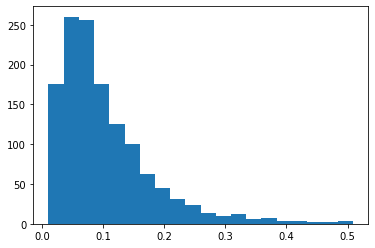

In [353]:
plt.hist(y_pred_svm,bins=20)

### RF

In [1]:
from sklearn.utils.class_weight import compute_class_weight

In [ ]:
compute_class_weight('balanced', np.unique(y_train),y_train)

In [107]:
from sklearn.ensemble import RandomForestClassifier
param_grid = {
                "n_estimators": [10,25,50,75,100,500,1000],
                "min_samples_split": [.1,.3,.5,.7,.9,1.],
                "min_weight_fraction_leaf": [0,.1,.3,.5], #min_weight_fraction_leaf must in [0, 0.5]
                "max_depth": [3, 4, 5, 6, 9, None],
#                     "cp_alpha": [0, 0.001, 0.003, 0.005, 0.010, 0.0015 ],
                "warm_start":[ False],
    "class_weight": ["balanced", "balanced_subsample"]
}
start = time.time()
grid_rf = RandomizedSearchCV(RandomForestClassifier(class_weight ='balanced',random_state=42), 
                             scoring=cv_scorer,
                          param_distributions=param_grid, cv=5,n_jobs=-1,n_iter=50,verbose=True)
grid_rf.fit(X_train, y_train)
end = time.time()
print(end - start)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   10.7s finished


12.40212106704712


In [108]:
grid_rf.best_params_
# {'warm_start': False, 'n_estimators': 500, 'min_weight_fraction_leaf': 0, 'min_samples_split': 0.3, 'max_depth': 9, 'class_weight': 'balanced_subsample'}

{'warm_start': False,
 'n_estimators': 1000,
 'min_weight_fraction_leaf': 0,
 'min_samples_split': 0.1,
 'max_depth': 6,
 'class_weight': 'balanced_subsample'}

In [5]:
y_pred_rf_tr=grid_rf.predict_proba(X_train)[:,1]

In [6]:
y_pred_rf=grid_rf.predict_proba(X_test)[:,1]

In [7]:
plt.hist(y_pred_rf_tr,bins=20)

NameError: name 'plt' is not defined

(array([ 72.,  46.,  30.,  28.,  45., 152., 124.,  65.,  70.,  71.,  46.,
        116., 141.,  77.,  75.,  67.,  31.,  32.,  15.,  14.]),
 array([0.24338697, 0.26737698, 0.29136698, 0.31535698, 0.33934698,
        0.36333699, 0.38732699, 0.41131699, 0.43530699, 0.45929699,
        0.483287  , 0.507277  , 0.531267  , 0.555257  , 0.57924701,
        0.60323701, 0.62722701, 0.65121701, 0.67520702, 0.69919702,
        0.72318702]),
 <a list of 20 Patch objects>)

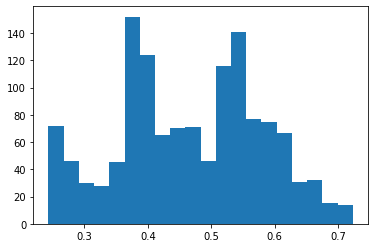

In [7]:
plt.hist(y_pred_rf,bins=20)

### LR

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0,penalty='none',verbose=1,solver='lbfgs',max_iter=1000).fit(train_new, y_train)

In [30]:
y_pred_lr=clf.predict_proba(test_new)[:,1]

In [15]:
y_pred_lr_tr=clf.predict_proba(train_new)[:,1]

In [63]:
from scipy.stats import norm
from sklearn.linear_model import LogisticRegression

def logit_pvalue(model, x):
    """ Calculate z-scores for scikit-learn LogisticRegression.
    parameters:
        model: fitted sklearn.linear_model.LogisticRegression with intercept and large C
        x:     matrix on which the model was fit
    This function uses asymtptics for maximum likelihood estimates.
    """
    p = model.predict_proba(x)
    n = len(p)
    m = len(model.coef_[0]) + 1
    coefs = np.concatenate([model.intercept_, model.coef_[0]])
    print(coefs.shape)
    x_full = np.matrix(np.insert(np.array(x), 0, 1, axis = 1))
    ans = np.zeros((m, m))
    for i in range(n):
        ans = ans + np.dot(np.transpose(x_full[i, :]), x_full[i, :]) * p[i,1] * p[i, 0]
    vcov = np.linalg.inv(np.matrix(ans))
    se = np.sqrt(np.diag(vcov))
    t =  coefs/se  
    p = (1 - norm.cdf(abs(t))) * 2
    return p

def logit_zstatistics(resLogit, X_train):

    predProbs = resLogit.predict_proba(X_train)

    # Design matrix -- add column of 1's at the beginning of your X_train matrix
    X_design = np.hstack([np.ones((X_train.shape[0], 1)), X_train])

    # Initiate matrix of 0's, fill diagonal with each predicted observation's variance
    V = np.diagflat(np.product(predProbs, axis=1))

    # Covariance matrix
    # Note that the @-operater does matrix multiplication in Python 3.5+, so if you're running
    # Python 3.5+, you can replace the covLogit-line below with the more readable:
    # covLogit = np.linalg.inv(X_design.T @ V @ X_design)
    covLogit = np.linalg.inv(np.dot(np.dot(X_design.T, V), X_design))
#     print("Covariance matrix: ", covLogit)

    # Standard errors
    se= np.sqrt(np.diag(covLogit))
#     print("Standard errors: ",se)

    # Wald statistic (coefficient / s.e.) ^ 2
    logitParams = np.insert(resLogit.coef_, 0, resLogit.intercept_)
    wald =  (logitParams / np.sqrt(np.diag(covLogit))) ** 2
#     print("Wald statistics: ",wald)
    
    return se , wald

# test p-values
logistic_p=logit_pvalue(clf2, train_new)
se, wald = logit_zstatistics(clf2, train_new)

(13,)


In [62]:
varnames= train_new.columns.tolist()
varnames.append('intercept')

coefs = clf2.coef_[0].tolist()
coefs.append(clf2.intercept_[0])

In [59]:
logistic_p 

array([0.00000000e+00, 1.15806764e-09, 2.34539934e-05, 1.09153575e-10,
       9.10809428e-01, 1.32166836e-03, 2.25337020e-01, 2.77259378e-01,
       6.12930595e-10, 3.14938316e-03, 3.18874213e-01, 5.70951379e-01,
       3.84632303e-01])

In [60]:
X_train.head()

,Sex.M1F0,age,dizziness,Hypertension,Diabetes,smoking,coronary.artery.disease,previous.stroke,Hyperlipidemia,수축기혈압,이완기혈압,맥박
0,1,49,1,1,0,1,0,0,0,152,94,77
1,0,60,0,1,0,0,0,0,0,169,105,71
2,1,61,0,0,0,0,1,0,0,138,89,67
3,0,58,0,1,1,0,0,1,0,188,109,71
4,0,70,0,0,0,0,0,0,1,131,92,71


In [61]:
clf2 = LogisticRegression(random_state=0,penalty='none',verbose=1,solver='lbfgs',max_iter=1000).fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s finished


In [65]:
y_pred2=clf2.predict_proba(X_test)[:,1]

In [67]:
#Coefficients fitted on the standardized data 
pd.set_option('display.float_format', lambda x: '%.4f' % x)
pd.DataFrame(data={"names":varnames,"coef":coefs,'SE': se,'Z': wald,"P":logistic_p})

,names,coef,SE,Z,P
0,Sex.M1F0,0.8575,0.5236,137.9824,0.0000
1,age,0.0283,0.4083,4.4111,0.0357
2,dizziness,0.9517,0.2098,0.0182,0.8926
3,Hypertension,-0.0188,0.4380,4.7218,0.0298
4,Diabetes,0.5335,0.3911,0.0023,0.9617
5,smoking,0.2842,0.4620,1.3332,0.2482
6,coronary.artery.disease,0.1862,0.5867,0.2347,0.6281
7,previous.stroke,1.0370,0.4864,0.1465,0.7019
8,Hyperlipidemia,0.4426,0.4394,5.5706,0.0183
9,수축기혈압,0.0040,0.4166,1.1288,0.2880


In [66]:
print(roc_auc_score(y_preds['Y_test'], y_pred2))


0.730525235563019


### Predictions

In [113]:
y_preds_tr=np.concatenate((y_train.values.reshape(len(y_train),1),
                        y_pred_lr_tr.reshape(len(y_train),1), 
                        y_pred_svm_tr.reshape(len(y_train),1), 
                        y_pred_rf_tr.reshape(len(y_train),1), 
                        y_pred_train.reshape(len(y_train),1)
                       ), axis=1)

In [114]:
y_preds=np.concatenate((y_test.values.reshape(len(y_test),1),
                        y_pred_lr.reshape(len(y_test),1), 
                        y_pred_svm.reshape(len(y_test),1), 
                        y_pred_rf.reshape(len(y_test),1), 
                        y_pred_cat.reshape(len(y_test),1)
                       ), axis=1)
y_preds.shape


(1317, 5)

In [11]:
y_preds=pd.DataFrame(y_preds,columns=['Y_test','Pred_lr','Pred_svm','Pred_rf','Pred_cat'])
y_preds_tr=pd.DataFrame(y_preds_tr,columns=['Y_train','Pred_lr','Pred_svm','Pred_rf','Pred_cat'])
# y_preds['Y_test']=y_test

NameError: name 'y_preds' is not defined

## save prediction data

In [395]:
savedir

'./results/ml_200527'

In [68]:
y_preds_tr.to_csv(f'{savedir}/ml_preds_trainset.csv',index=False)

In [49]:
y_preds.to_csv(f'{savedir}/ml_preds.csv',index=False)

In [106]:
cols={"LR":"#FF800E",'SVM':"#7E6148B2",'RF':"#DC0000B2",'CAT':"#00A087B2"} #DL":"#006BA4"
#blue, yellow,brown ,red, green
algs=[str.lower(x) for x in cols.keys()]
print(algs)

['lr', 'svm', 'rf', 'cat']


In [47]:
savedir

'./results/ml_200602'

In [403]:
import pickle
objs = [X_train, X_test, y_train, y_test, clf, grid, grid_rf, gbm_model]
save_object(objs, f'{savedir}/DatasetsandModels_200528.pkl')
# clf=logistic; grid = svm; grid_rf=random forest; gbm_model = catboost

In [21]:
# with open("./results/ml_200527/DatasetsandModels_200528.pkl", 'rb') as input:
#     [X_train, X_test, y_train, y_test, clf, grid, grid_rf, gbm_model]  = pickle.load(input)

/home/skjang/.local/lib/python3.7/site-packages/sklearn/base.py:334: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.21.2 when using version 0.23.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/skjang/.local/lib/python3.7/site-packages/sklearn/base.py:334: UserWarning: Trying to unpickle estimator SVC from version 0.21.2 when using version 0.23.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/skjang/.local/lib/python3.7/site-packages/sklearn/base.py:334: UserWarning: Trying to unpickle estimator RandomizedSearchCV from version 0.21.2 when using version 0.23.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/skjang/.local/lib/python3.7/site-packages/sklearn/base.py:334: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.21.2 when using version 0.23.1. This might lead to breaking code 

In [9]:
y_preds = pd.read_csv('/home/hdd1/Projects/dizziness/results/ml_200710/ml_preds.csv')
y_preds_tr = pd.read_csv('/home/hdd1/Projects/dizziness/results/ml_200710/ml_preds_trainset.csv')

In [13]:
y_preds

,Y_test,Pred_lr,Pred_svm,Pred_rf,Pred_cat
0,0.0,0.127120,0.130194,0.167033,0.122383
1,0.0,0.050909,0.048544,0.043312,0.064104
2,0.0,0.081642,0.048544,0.043312,0.056124
3,0.0,0.037149,0.037344,0.043312,0.041744
4,0.0,0.015940,0.000000,0.015444,0.028074
5,0.0,0.133425,0.203125,0.104167,0.182824
6,1.0,0.150659,0.203125,0.167033,0.149914
7,0.0,0.012810,0.000000,0.015444,0.020079
8,0.0,0.160736,0.182927,0.167033,0.140862
9,0.0,0.059024,0.048544,0.043312,0.046272


## ROC curve

In [15]:
import numpy as np
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_preds['Y_test'], y_preds['Pred_lr']))
print(roc_auc_score(y_preds['Y_test'], y_preds['Pred_svm']))
print(roc_auc_score(y_preds['Y_test'], y_preds['Pred_rf']))
print(roc_auc_score(y_preds['Y_test'], y_preds['Pred_cat']))

0.7304452707475378
0.7267568936334678
0.6929750909599777
0.7379952820758866


In [13]:
precision

array([0.1       , 0.09928515, 0.09936407, ..., 0.        , 0.        ,
       1.        ])

In [14]:
recall

array([1.        , 0.99206349, 0.99206349, ..., 0.        , 0.        ,
       0.        ])

0.20432630450951747
0.18851513691784422
0.20854622870664352
0.20415114257654401


/home/skjang/anaconda3/envs/skorch/lib/python3.7/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Unrecognized location 'top right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  from ipykernel import kernelapp as app


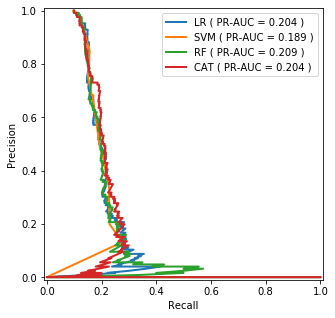

In [19]:
from sklearn.metrics import precision_recall_curve, average_precision_score
fig_size=(5,5)

plt.figure(figsize=fig_size)
plt.xlabel('Recall ( True positive rate )')
plt.ylabel('Precision ( Positive predictive value )')
# plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
for alg in ['lr','svm','rf','cat']:
    exec(f"precision, recall, thresholds = precision_recall_curve(y_preds['Y_test'], y_preds['Pred_{alg}'])")
    exec(f"pr_auc = average_precision_score(y_preds['Y_test'], y_preds['Pred_{alg}'])")
    print(pr_auc)
    plt.plot( recall,precision,  lw=2, label='%s ( AUPR = %0.3f )' %(alg.upper(), pr_auc))
    plt.legend(loc="upper right")
    
plt.savefig('/home/hdd1/Projects/dizziness/results/PR_curve_4models_200710.png', dpi=600,  transparent=False, bbox_inches=None, pad_inches=0.1)

0.7304452707475378
0.7267568936334678
0.7264470299734783
0.7379952820758866


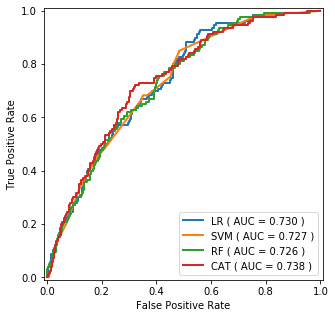

In [16]:
import datetime
from sklearn.metrics import roc_curve, auc
fig_size=(5,5)
date=datetime.datetime.now().strftime("%y%m%d")


#GRAPH DATA
plt.figure(figsize=fig_size)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
for alg in ['lr','svm','rf','cat']:
    exec(f"fpr, tpr, thresholds = roc_curve(y_preds['Y_test'], y_preds['Pred_{alg}'])")
    roc_auc = auc(fpr, tpr)
    print(roc_auc)
    plt.plot(fpr, tpr,  lw=2, label='%s ( AUC = %0.3f )' %(alg.upper(), roc_auc))
    plt.legend(loc="lower right")
    
plt.savefig('/home/hdd1/Projects/dizziness/results/ROC_curve_4models_200710.png', dpi=600, format='png',  transparent=False, bbox_inches=None, pad_inches=0.1)

## calibration curve

In [14]:
from sklearn.calibration import calibration_curve
mpv, fop = calibration_curve( y_preds['Y_test'],y_preds['Pred_rf'],n_bins=10, strategy='quantile')

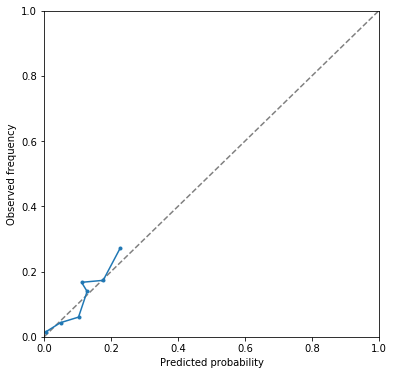

In [15]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(6,6))
ax = plt.axes()
plt.plot([0, 1], [0, 1], linestyle='--',color='grey')
ax.set(ylabel='Observed frequency', xlabel='Predicted probability')
ax.set(xlim=[0,1],ylim=[0,1]) 
plt.plot(mpv, fop, marker='.')
plt.show()

In [54]:
y_preds['Pred_cat'].describe()

count    1317.000000
mean        0.101427
std         0.061662
min         0.018898
25%         0.052833
50%         0.088668
75%         0.133163
max         0.379032
Name: Pred_cat, dtype: float64

In [133]:
fpr, recall, thresholds = roc_curve(y_preds['Y_test'],y_preds['Pred_rf'])


In [147]:
fprc=fpr.copy()
fprc[recall<=0.99] =1
idx= np.argmin(fprc)

In [149]:
fprc[idx]

0.8589420654911839

In [150]:
recall[idx]

0.9920634920634921

## Optimal Threshold

In [18]:
def estimateOptimalThreshold(y_true, y_proba, verbose=True, method='specificity',niter=10,kfold=5,sen=0.99):
    from sklearn.metrics import precision_recall_curve, f1_score, confusion_matrix
    from sklearn.model_selection import RepeatedStratifiedKFold
    import numpy as np
    np.seterr(divide='ignore', invalid='ignore')
    def threshold_search(yt, yp):
        if method=='F1':
            precision, recall, thresholds = precision_recall_curve(yt, yp)
            thresholds = np.append(thresholds, 1.001) 
            F = 2 / (1/precision + 1/recall)
            best_score = np.max(F)
            best_th = thresholds[np.argmax(F)]
        elif method=='specificity': 
            fpr, recall, thresholds = roc_curve(yt, yp)
            fprc=fpr.copy()
            fprc[recall<=sen] =1
            idx= np.argmin(fprc)
            best_score=1-fpr[idx] # specificity at recall>0.99
            best_th =thresholds[idx]
        return best_th 
    if type(y_true)==pd.Series:
        y_true=y_true.values.copy()
    rkf = RepeatedStratifiedKFold(n_splits=kfold, n_repeats=niter)
    scores = []
    ths = []
    for train_index, test_index in rkf.split(y_true, y_true):
        y_prob_train, y_prob_test = y_proba[train_index], y_proba[test_index]
        y_true_train, y_true_test = y_true[train_index], y_true[test_index]
        # determine best threshold on 'train' part 
        best_threshold = threshold_search(y_true_train, y_prob_train)
        # use this threshold on 'test' part for score 
        if method=='F1':
            sc = f1_score(y_true_test, (y_prob_test > best_threshold).astype(int))
        elif method=='specificity':
            tn, fp, fn, tp=confusion_matrix(y_true_test, y_prob_test>best_threshold).ravel()
            sc=(tn/(fp+tn))#specificity
            # sc=(tp/(tp+fp))#precision
        scores.append(sc)
        ths.append(best_threshold)
    best_th = np.median(ths)
    score = np.mean(scores)
    if verbose: print(f'Best threshold: {np.round(best_th, 4)}, Score: {np.round(score,5)}')
    return best_th, score

In [19]:
from sklearn.metrics import confusion_matrix, recall_score,roc_auc_score,confusion_matrix


In [20]:
from sklearn.metrics import precision_score

for alg in ['lr','svm','rf','cat']:
    print(alg)
    exec(f"auc_{alg}=roc_auc_score(y_preds['Y_test'], y_preds['Pred_{alg}']);print(round(auc_{alg},3))")
    print('sensitivity = 99%')
    exec(f"thr99_{alg},_=estimateOptimalThreshold(y_preds_tr['Y_train'],y_preds_tr['Pred_{alg}'],sen=0.99)")
    exec(f"sen99_{alg}=recall_score(y_preds['Y_test'], y_preds['Pred_{alg}']>thr99_{alg});print(round(sen99_{alg},3))")
    exec(f"tn, fp, fn, tp = confusion_matrix(y_preds['Y_test'], y_preds['Pred_{alg}']>thr99_{alg}).ravel(); spe99_{alg}=tn/(tn+fp);print(round(spe99_{alg},3))")
    print('sensitivity = 99.9%')
    exec(f"thr999_{alg},_=estimateOptimalThreshold(y_preds_tr['Y_train'],y_preds_tr['Pred_{alg}'],sen=0.999)")
    exec(f"sen999_{alg}=recall_score(y_preds['Y_test'], y_preds['Pred_{alg}']>thr999_{alg});print(round(sen999_{alg},3))")
    exec(f"tn, fp, fn, tp = confusion_matrix(y_preds['Y_test'], y_preds['Pred_{alg}']>thr999_{alg}).ravel(); spe999_{alg}=tn/(tn+fp);print(round(spe999_{alg},3))")


lr
0.73
sensitivity = 99%
Best threshold: 0.0252, Score: 0.14277
0.992
0.107
sensitivity = 99.9%
Best threshold: 0.0209, Score: 0.09468
0.992
0.068
svm
0.727
sensitivity = 99%
Best threshold: 0.031, Score: 0.1605
0.984
0.156
sensitivity = 99.9%
Best threshold: 0.0266, Score: 0.10619
0.992
0.116
rf
0.693
sensitivity = 99%
Best threshold: 0.3252, Score: 0.1911
0.0
0.997
sensitivity = 99.9%
Best threshold: 0.2711, Score: 0.10751
0.103
0.974
cat
0.738
sensitivity = 99%
Best threshold: 0.0426, Score: 0.22858
0.984
0.152
sensitivity = 99.9%
Best threshold: 0.028, Score: 0.09888
1.0
0.046


해보니까 estimateOptimalThreshold로 repeated k-fold한거랑, trainset에서 바로 구한거랑 똑같음 -.-

In [94]:
y_preds.head()

,Y_test,Pred_lr,Pred_svm,Pred_rf,Pred_cat
0,0.0000,0.1271,0.1302,0.1670,0.1224
1,0.0000,0.0509,0.0485,0.0433,0.0641
2,0.0000,0.0816,0.0485,0.0433,0.0561
3,0.0000,0.0371,0.0373,0.0433,0.0417
4,0.0000,0.0159,0.0000,0.0154,0.0281


In [89]:
thr99df=pd.DataFrame([thr99_lr,thr99_svm,thr99_rf,thr99_cat],index= ['lr','svm','rf','cat'],columns=['sen99'])
thr999df=pd.DataFrame([thr999_lr,thr999_svm,thr999_rf,thr999_cat],index= ['lr','svm','rf','cat'],columns=['sen999'])

In [93]:
thrdf=pd.concat([thr99df,thr999df],1)
thrdf.to_csv('/home/hdd1/Projects/dizziness/results/ml_200710/thresholds.csv')

In [97]:
y_preds_tr['Pred_rf'].describe()

count   3164.0000
mean       0.4420
std        0.1155
min        0.2422
25%        0.3627
50%        0.4293
75%        0.5342
max        0.7410
Name: Pred_rf, dtype: float64

In [96]:
y_preds['Pred_rf'].describe()

count   1317.0000
mean       0.1028
std        0.0822
min        0.0154
25%        0.0433
50%        0.0531
75%        0.1670
max        0.4444
Name: Pred_rf, dtype: float64

### Confusion matrix

In [173]:
confusion_matrix(y_preds['Y_test'],y_preds['Pred_svm']>thr99_svm)

array([[ 138, 1053],
       [   1,  125]])

In [174]:
confusion_matrix(y_preds['Y_test'],y_preds['Pred_cat']>thr999_cat)

array([[  55, 1136],
       [   0,  126]])

In [219]:
len(y_preds['Y_test'])

1317

In [214]:
y_preds['Y_test'].value_counts()

0.0    1191
1.0     126
Name: Y_test, dtype: int64

In [215]:
(y_preds['Pred_svm']>thr99_svm).value_counts()

True     1178
False     139
Name: Pred_svm, dtype: int64

In [216]:

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred_binary, flag,classes=None,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues,
                          savepth=None,
                          fig_size=(2,6),
                          binary_label=True, #binary or original mRS
                          auc=0,
                          date=datetime.datetime.now().strftime("%y%m%d")):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    def labelling(a,cutoff):
        if cutoff==1:
            l='greater than 1' if a ==0 else 'less than or equal to 1'
        else :
            l='greater than 2' if a ==0 else 'less than or equal to 2'
        return l
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred_binary)
    # Only use the labels that appear in the data
    xc = unique_labels(y_pred_binary)
    yc = unique_labels(y_true)
    cm = cm[:len(yc),:len(xc)]
    if not classes==None:  
        xc = yc = classes[unique_labels(y_true, y_pred_binary)]

#     xcl = [labelling(x,cutoff=flag)  for x in xc.astype('int').tolist()]
#     if binary_label :
#         ycl = [labelling(x,cutoff=flag)  for x in yc.astype('int').tolist()]
#     else:
#         ycl=yc.astype('str').tolist()

    if normalize:
        cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots(figsize=fig_size)
    im = ax.imshow(cmn if normalize else cm, interpolation='nearest', cmap=cmap)
    # ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]+1)-0.5,
           yticks=np.arange(cm.shape[0]+1)-0.5,
           # ... and label them with the respective list entries
           xticklabels=['\n\n\nNon-central','\n\n\nCentral'],
           yticklabels=['\n\n\nNon-central','\n\n\nCentral'],
           title=title,
           ylabel='True diagnosis',
           xlabel='Predicted diagnosis')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    
    thresh =  0.5 if normalize else (cm.max() / 2.)
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, '%.2f\n(n = %s)' %(cmn[i, j],cm[i, j]) if normalize else cm[i, j],
                    ha="center", va="center",fontsize=9,
                    color=("yellow" if normalize else "white") 
                    if (cmn[i, j] if normalize else cm[i, j]) > thresh 
                    else "black")
    fig.tight_layout()
#     return ax
    if not savepth == None:
        plt.savefig('%s/confmat_%s_%s.png' %(savepth,flag,date),dpi=600)


Confusion matrix, without normalization
[[ 138 1053]
 [   1  125]]


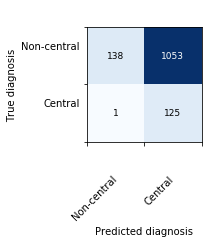

In [217]:
plot_confusion_matrix(y_preds['Y_test'],y_preds['Pred_svm']>thr99_svm,flag='svm99A',title="",fig_size=(3,4),savepth=savedir)

Confusion matrix, without normalization
[[  55 1136]
 [   0  126]]


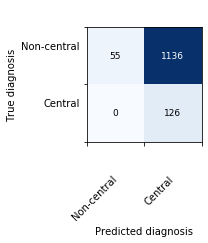

In [218]:
plot_confusion_matrix(y_preds['Y_test'],y_preds['Pred_cat']>thr999_cat,flag='cat999B',title="",fig_size=(3,4),savepth=savedir)